# Data Science 2
## Numerical analysis - Root finding

The following material is largely covered in Chapter 4 - *Roots of Equations* of the book *Numerical methods in engineering with Python 3* by Jaan Kiusalaas (see BlackBoard).

### Introduction

A common problem encountered in engineering analysis is as follows: Given a function $f(x)$, determine the values of $x$ for which $f(x) = 0$. The solutions (values of $x$) are known as the *roots* of the equation $f(x) = 0$, or the *zeroes* of the function $f(x)$. Almost *any* equation that requires solving can be written this way by moving the terms on the right hand side of the equation to the left hand side.

All methods of finding roots are iterative procedures that require a starting point (i.e., an estimate of the root). This estimate is crucial; a bad starting value may fail to converge, or it may converge to the "wrong" root (a root different from the one sought). It is highly advisable to go a step further and *bracket* the root (determine its lower and upper bounds) before passing the problem to a root-finding algorithm.

### Incremental Search Method

The basic idea behind the incremental search method is simple: If $f(x_1)$ and $f(x_2)$ have opposite signs, then there is at least one root in the interval $(x_1, x_2)$. If the interval is small enough, it is likely to contain a single root. Thus the zeros of $f(x)$ can be detected by evaluating the function at intervals $\Delta x$ and looking for a change in sign.

There are several potential problems with the incremental search method:

- It is possible to miss two closely spaced roots if the search increment $\Delta x$ is larger than the spacing of the roots.

- A double root (two roots that coincide) will not be detected.

- Certain singularities (poles) of $f(x)$ can be mistaken for roots.

Below you find a generator function `rootsearch` that divides an interval $(a, b)$ into `steps` equal intervals and then sequentially returns the intervals for which the function values of a function `f` brackets a root based on a change in sign of the function.

In [1]:
def rootsearch(f, a, b, steps):
    """lo, hi = rootsearch(f, a, b, steps).
    Searches the interval (a,b) in a number of steps for
    the bounds (lo,hi) of the roots of f(x).
    """
    h = (b - a) / steps
    f_lo = f(a)
    for step in range(steps):
        lo = a + step * h
        hi = lo + h
        f_hi = f(hi)
        if f_lo * f_hi <= 0.0:
            yield lo, hi
        f_lo = f_hi

We apply the method to an example where we look for a solution to $\cos(x) = x$. This is equivalent to finding a root of the function $f(x) = \cos(x) - x$. The [unique solution](https://www.wolframalpha.com/input/?i=solve+cos%28x%29%3Dx) is $x \approx 0.7390851332151606416$.

0.72 < 0.7390851332151607 < 0.74


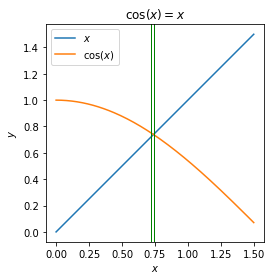

In [2]:
# Example: Solve cos(x) = x
from math import sin, cos
func = lambda x: cos(x) - x       # the function, for now
dfunc = lambda x: -sin(x) - 1.0   # the derivative, for later
solution = 0.7390851332151606416

for lo, hi in rootsearch(func, 0.0, 1.0, 50):
    print(lo, '<', solution, '<', hi)

%matplotlib inline
import matplotlib.pyplot as plt
qx = [i/100.0 for i in range(151)]
qy = [cos(x) for x in qx]

plt.plot(qx, qx, label='$x$')
plt.plot(qx, qy, label='$\cos(x)$')
plt.axvline(x=lo, linewidth=1, color='g'); plt.axvline(x=hi, linewidth=1, color='g')
plt.title('$\cos(x)=x$'); plt.xlabel('$x$'); plt.ylabel('$y$'); plt.axis('square'); plt.legend(); plt.show()

### Method of Bisection

After a root of $f(x) = 0$ has been bracketed in the interval $(x_1, x_2)$, several methods can be used to close in on it. The [method of bisection](https://en.wikipedia.org/wiki/Bisection_method) accomplishes this by successively halving the interval until it becomes sufficiently small. Once a root has been bracketed, bisection will always close in on it.

The method of bisection uses the same principle as incremental search: If there is a root in the interval $(x_1, x_2)$, then $f(x_1)$ and $f(x_2)$ have opposite signs. To halve the interval, we compute $f(x_3)$, where $x_3 = \frac{1}{2}(x_1+x_2)$ is the midpoint of the interval. If $f(x_2)$ and $f(x_3)$ have opposite signs, then the root must be in $(x_3, x_2)$, and we record this by replacing the original bound $x_1$ by $x_3$. Otherwise, the root lies in $(x_1, x_3)$, in which case $x_2$ is replaced by $x_3$. In either case, the new interval $(x_1, x_2)$ is half the size of the original interval. The bisection is repeated until the interval has been reduced to a small value $\varepsilon$, so that $\left| x_2−x_1 \right| \leq \varepsilon$.

**Exercise 1**

Complete the below function `bisection` that incrementally bisects an interval $(a, b)$ that is known to bracket a root until the size of the interval $\varepsilon$ becomes smaller than some tolerance `tol` (for which you may choose a suitable default value).

Note: Assume that the evaluation of `f` is computationally intensive, so minimize the number of function evaluations (i.e. do not evaluate the function twice for the same argument value)!

In [3]:
def bisection(f, a, b, tol=...):
    """root = bisection(f, a, b, tol=...).
    Finds a root of f(x) = 0 by bisection.
    The root must be bracketed in (a,b).
    """
#     count = 0
    lo, f_lo = a, f(a)
    if f_lo == 0.0:
        return lo
    hi, f_hi = b, f(b)
    if f_hi == 0.0:
        return hi
    if f_lo * f_hi > 0.0:
        raise ValueError('Root is not bracketed')
    while abs(hi - lo) > tol:
#         count += 1
        mid = (hi + lo) / 2.0
        f_mid = f(mid)
        
        if f_mid == 0:
            return md
        if f_mid < 0.0:
            hi, f_hi = mid, f_mid
        else:
            lo, f_lo = mid, f_mid
#     print(count)

    return (lo + hi) / 2.0

In [4]:
# Example: Solve cos(x) = x
root = bisection(func, lo, hi, 1e-12)
print(f'x: {root} (error={abs(root - solution):8.1e})')

x: 0.7390851332151211 (error= 4.0e-14)


### Secant Method

The [secant method](https://en.wikipedia.org/wiki/Secant_method) and the [false position method](https://en.wikipedia.org/wiki/Regula_falsi) are closely related. Both methods require two starting estimates of the root, say, $x_1$ and $x_2$. The function $f(x)$ is assumed to be approximately linear near the root, so that the improved value $x_3$ of the root can be estimated by linear interpolation between $x_1$ and $x_2$. This leads to

$$
x_3 = \frac{f_1 x_2 - f_2 x_1}{f_1 - f_2}
$$

- The *false position* method (also known as *regula falsi*) requires $x_1$ and $x_2$ to bracket the root. After the improved root is computed, either $x_1$ or $x_2$ is replaced by $x_3$: if $f_3$ has the same sign as $f_1$, we let $x_1 \leftarrow x_3$; otherwise we choose $x_2 \leftarrow x_3$. In this manner, the root remains bracketed in $(x_1, x_2)$.

- The *secant* method differs from the false position method in two ways: It does not require prior bracketing of the root, and it discards the oldest prior estimate of the root (i.e., after $x_3$ is computed, we let $x_1, x_2 \leftarrow x_2, x_3)$.

**Exercise 2**

Write a function `secant` that repeatedly applies the interpolation formula and updates the values $x_1$ and $x_2$. Stop when the size of the interval $\varepsilon$ becomes smaller than some tolerance `tol` (with suitable default). The function should return a single number that forms an estimate of the root.

Note: Again, minimize the number of function evaluations!

In [19]:
# import numpy as np

# def secant(f, a, b, tol=1e-6):
#     """root = secant(f, a, b, tol=1e-6).
#     Finds a root of f(x) = 0 by the secant method.
#     """
#     c = (f(a)*b - f(b)*a) / (f(a)-f(b))
#     error = c - a
#     while error < tol:
#         b = c
#         c = (f(a)*b - f(b)*a) / (f(a)-f(b))
#         error = c - a
#     return c

# # secant(np.cos, 0, 0.5, tol=1e-6)

In [22]:
def secant(f, a, b, tol=1e-8):
    """root = secant(f, a, b, tol=1e-6).
    Finds a root of f(x) = 0 by the secant method.
    """
    x1 = a
    f1 = f(x1)
    if f1 == 0:
        return x1
    x2 = b
    f2 = f(x2)
    if f2 == 0:
        return x2
    while abs(x2 - x1) > tol:
        x3 = (f1*x2 - f2*x1)/(f1-f2)
        f3 = f(x3)
        if f3 == 0:
            return x3
        x1, x2, f1, f2 = x2, x3, f2, f3
    return x2

In [24]:
# Example: Solve cos(x) = x
root = secant(func, lo, hi, 1e-6)
print(f'x: {root} (error={abs(root - solution):8.1e})')

x: 0.7390851332151613 (error= 6.7e-16)


### Newton-Raphson Method

The [Newton-Raphson method](https://en.wikipedia.org/wiki/Newton%27s_method) is the best known method of finding roots for a good reason: It is simple and fast. The only drawback of the method is that it uses the derivative $f'(x)$ of the function as well as the function $f(x)$ itself. Therefore, the Newton-Raphson method is usable only in problems where $f'(x)$ can be readily computed.

The algorithm for the Newton-Raphson method is simple: it repeatedly applies

$$
x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}
$$

starting with an initial value $x_0$, until the convergence criterion $\left| x_{i+1} − x_i \right| < \varepsilon$
is reached. Only the latest value of x has to be stored.

**Exercise 3**

The (positive) square root of two, $\sqrt{2} \approx 1.41421$, can be calculated by solving $f(x) = x^2 - 2 = 0$.

- Starting from the bracketing interval $(1, 2)$, analytically perform three iterations of the bisection method.

- Starting from an initial estimate $x_0 = 1$, analytically perform three iterations of the Newton-Raphson algorithm.

Compare the convergence of these methods by completing the following table and checking how many digits of the answers are accurate.

| Iteration i | Bisection (a+b)/2                      | Newton-Raphson $x_i$          |
| :---------: | :------------------------------------: | :---------------------------: |
|      0      | $(1, 2) \rightarrow 1.5$               | $1 \rightarrow 1$             |
|      1      | $(1, \frac{3}{2}) \rightarrow 1.25$    | $\frac{3}{2} \rightarrow 1.5$ |
|      2      | $(\ldots, \ldots) \rightarrow \ldots$  | $\ldots \rightarrow \ldots$   |
|      3      | $(\ldots, \ldots) \rightarrow \ldots$  | $\ldots \rightarrow \ldots$   |

In [ ]:
#-------------#-------------------#--------------------#
# Iteration i # Bisection (a+b)/2 # Newton-Raphson x_i #
#-------------#-------------------#--------------------#
#      0      # (1, 2)   -> 1.5   # 1   -> 1.          #
#      1      # (1, 3/2) -> 1.25  # 3/2 -> 1.5         #
#      2      # (.., ..) -> ..    # ..  -> ..          #
#      3      # (.., ..) -> ..    # ..  -> ..          #
#-------------#-------------------#--------------------#

Although the Newton-Raphson method converges fast near the root, its global convergence characteristics are poor. However, the method can be made nearly fail-safe by combining it with bisection.

**Exercise 4**

Write a function `newton_raphson` that repeatedly applies the Newton-Raphson formula to obtain an increasingly better estimate of the root. For a given interval $(a, b)$ that brackets an estimate of the root $x_0$, repeatedly perform Newton-Raphson to improve the estimate of the root. Each time, if the new estimate falls inside the bracket, use it to improve the bracket; if it falls outside, ignore the new estimate and perform bisection instead. Continue until the magnitude of the update according to Newton-Raphson becomes smaller than some tolerance `tol`. The function should return a single number that forms an estimate of the root.

In [ ]:
def newton_raphson(f, df, a, b, tol=...):
    """root = newton_raphson(f, df, a, b, tol=....).
    Finds a root of f(x) = 0 by combining the Newton-Raphson
    method with bisection. The root must be bracketed in (a,b).
    Calls user-supplied functions f(x) and its derivative df(x).
    """
    pass   # ADD YOUR OWN CODE HERE

In [ ]:
# Example: Solve cos(x) = x
root = newton_raphson(func, dfunc, lo, hi, 1e-4)
print(f'x: {root} (error={abs(root - solution):8.1e})')

### Exercises

**Exercise 5**

Determine *all* roots of the polynomial [equation](https://www.wolframalpha.com/input/?i=x%5E3%E2%88%923.23x%5E2%E2%88%925.54x%2B9.84%3D0) $x^3 − 3.23 x^2 − 5.54 x + 9.84 = 0$ to at least nine correct decimals using an algorithm of your own choice.

In [ ]:
pass   # ADD YOUR OWN CODE HERE

**Exercise 6**

The [golden ratio](https://www.wikiwand.com/en/Golden_ratio) $\phi$ is a number that is often referred to in art, but that also occurs in nature. Among other things, it has the property that it equals the average of its square and its inverse, i.e. $\phi = \frac{\phi^2+1/\phi}{2}$. Note that this equation has three solutions, only one of which is the golden ratio.

Determine the value of the golden ratio by solving the aforementioned equation to twelve digits accuracy. Compare the output of your own `secant()` and `newton_raphson()` methods to that of the [newton](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html) method of the `scipi.optimize` module, which can be used to execute either method by providing a derivative function or not.

In [ ]:
pass   # ADD YOUR OWN CODE HERE

**Exercise 7**

A solution of the [equation](https://www.wolframalpha.com/input/?i=plot+tan%28x%29%3Dtanh%28x%29+from+0+to+12) $\tan(x) = \tanh(x)$ lies in $(7.0, 7.4)$. Find this solution with at least six decimal place accuracy using the various methods from this lesson. (If necessary, look up the derivatives of these functions online.)

In [ ]:
pass   # ADD YOUR OWN CODE HERE

**Exercise 8**

The [Omega constant](https://en.wikipedia.org/wiki/Omega_constant) is defined as the unique value $\Omega$ that satisfies $\Omega e^\Omega = 1$. Calculate the value of this constant to 12 decimals using root finding with Newton-Raphson's method. (See e.g. [this YouTube video](https://www.youtube.com/watch?v=EjUp_5X6io4).)

In [ ]:
pass   # ADD YOUR OWN CODE HERE

***